<a href="https://colab.research.google.com/github/dahlia52/Commercial-District-Analysis/blob/main/code/clustering2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#matplotlib 한글 깨짐 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (6,617 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122352 files and di

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

import seaborn as sns
import numpy as np

In [ ]:
sales = pd.read_csv('/content/drive/MyDrive/BOAZ/광진구팟/Data/상권분석/sales_광진.csv')

In [ ]:
sales.head()

시군구명 행정동명 상권_구분_코드_명 상권_코드_명          경도         위도  엑스좌표_값  와이좌표_값  \
0  광진구  군자동       골목상권   세종대학교  127.074085  37.555226  206732  450331   
1  광진구  군자동       골목상권   세종대학교  127.074085  37.555226  206732  450331   
2  광진구  군자동       골목상권   세종대학교  127.074085  37.555226  206732  450331   
3  광진구  군자동       골목상권   세종대학교  127.074085  37.555226  206732  450331   
4  광진구  군자동       골목상권   세종대학교  127.074085  37.555226  206732  450331   

      행정동코드    상권_코드  ... 시간대_건수~24_매출_건수 남성_매출_건수  여성_매출_건수 연령대_10_매출_건수  \
0  11215730  2110149  ...               0      906       321            0   
1  11215730  2110149  ...               7       84       154            0   
2  11215730  2110149  ...              27      938      1391           21   
3  11215730  2110149  ...              52     1663      1716           61   
4  11215730  2110149  ...             177     1620      1012           10   

  연령대_20_매출_건수 연령대_30_매출_건수  연령대_40_매출_건수  연령대_50_매출_건수  연령대_60_이상_매출_건수  점포수  
0          139          336           262           242              248    *  
1           56           56            77            49                0    *  
2          554          551           508           435              260    4  
3         1260          942           509           494              115    *  
4          213          716           800           488              406    *  

[5 rows x 88 columns]

In [ ]:
# 삭제 : '시군구명', '경도', '위도', '엑스좌표_값', '와이좌표_값', '행정동코드', '상권_코드', '상권_구분_코드_x', '행정동명', '상권_구분_코드_y', '서비스_업종_코드', '점포수'
sales.drop(['시군구명', '경도', '위도', '엑스좌표_값', '와이좌표_값', '행정동코드', '상권_코드', '상권_구분_코드_x', '행정동명', '상권_구분_코드_y', '서비스_업종_코드', '점포수'], axis=1, inplace=True)
sales.columns

Index(['상권_구분_코드_명', '상권_코드_명', '법정동명', '기준_분기_코드', '서비스_업종_코드_명', '분기당_매출_금액',
       '분기당_매출_건수', '주중_매출_비율', '주말_매출_비율', '월요일_매출_비율', '화요일_매출_비율',
       '수요일_매출_비율', '목요일_매출_비율', '금요일_매출_비율', '토요일_매출_비율', '일요일_매출_비율',
       '시간대_00~06_매출_비율', '시간대_06~11_매출_비율', '시간대_11~14_매출_비율',
       '시간대_14~17_매출_비율', '시간대_17~21_매출_비율', '시간대_21~24_매출_비율', '남성_매출_비율',
       '여성_매출_비율', '연령대_10_매출_비율', '연령대_20_매출_비율', '연령대_30_매출_비율',
       '연령대_40_매출_비율', '연령대_50_매출_비율', '연령대_60_이상_매출_비율', '주중_매출_금액',
       '주말_매출_금액', '월요일_매출_금액', '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액',
       '금요일_매출_금액', '토요일_매출_금액', '일요일_매출_금액', '시간대_00~06_매출_금액',
       '시간대_06~11_매출_금액', '시간대_11~14_매출_금액', '시간대_14~17_매출_금액',
       '시간대_17~21_매출_금액', '시간대_21~24_매출_금액', '남성_매출_금액', '여성_매출_금액',
       '연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액', '연령대_40_매출_금액',
       '연령대_50_매출_금액', '연령대_60_이상_매출_금액', '주중_매출_건수', '주말_매출_건수', '월요일_매출_건수',
       '화요일_매출_건수', '수요일_매출_건수', '목요일_매출_건수', '금요일_매출_건수', '토요일_매출_건수',
       '일요

In [ ]:
def service(df): #대표업종 5개 구하기
    df.groupby(['상권_코드_명', '서비스_업종_코드_명']).agg({'분기당_매출_금액':"sum"}).reset_index(drop=False)
    h = df.groupby(['상권_코드_명', '서비스_업종_코드_명']).agg({'분기당_매출_금액':"sum"}).reset_index(drop=False)
    h.rename(columns = {'분기당_매출_금액':'총_매출_금액'}, inplace=True)
    h = h.sort_values(by = ['상권_코드_명','총_매출_금액'], ascending = [True, False])
    h= h.groupby('상권_코드_명').agg({'서비스_업종_코드_명':lambda x: list(x)[:5]}).reset_index()
    h.rename(columns = {'서비스_업종_코드_명':'대표_업종'}, inplace=True)
    return h

In [ ]:
sales2 = service(sales)
sales2

상권_코드_명                                  대표_업종
0   강변역(테크노마트)  [컴퓨터및주변장치판매, 전자상거래업, 핸드폰, 가전제품, 일반의류]
1     건대입구역 1번      [한식음식점, 호프-간이주점, 편의점, 치킨전문점, 노래방]
2     건대입구역 6번         [중식음식점, 반찬가게, 편의점, 한식음식점, 의약품]
3    건대입구역(건대)    [한식음식점, 커피-음료, 일반의원, 일반의류, 호프-간이주점]
4      광나루역 1번       [한식음식점, 편의점, 중식음식점, 치과의원, 커피-음료]
..         ...                                    ...
56      푸른동산공원         [편의점, 치과의원, 육류판매, 분식전문점, 슈퍼마켓]
57       한아름시장     [일반의원, 분식전문점, 치과의원, 스포츠클럽, 일반교습학원]
58       해오름공원          [편의점, 한식음식점, 의약품, 슈퍼마켓, 일반의원]
59       화양사거리            [편의점, 한식음식점, 반찬가게, 여관, 세탁소]
60    화양제일골목시장     [반찬가게, 한식음식점, 호프-간이주점, 슈퍼마켓, 육류판매]

[61 rows x 2 columns]

In [ ]:
# 대표업종 여부 열 추가
for idx, i in enumerate(set(sum(list(sales2.대표_업종),[]))):
  sales2[i] = 0 # 열 생성
  for j in range(61):
    if i in sales2.iloc[j,1]:
      sales2.iloc[j,(2+idx)] = 1

In [ ]:
sales2.drop(['대표_업종'], axis=1, inplace=True)

In [ ]:
# 상권_코드_명, 기준_분기_코드, 서비스_업종_코드_명 기준으로 매출 금액 및 건수 합산
sales3 = sales.drop(['주중_매출_비율', '주말_매출_비율', '월요일_매출_비율', '화요일_매출_비율', '수요일_매출_비율', '목요일_매출_비율', '금요일_매출_비율', '토요일_매출_비율', '일요일_매출_비율',
                     '시간대_00~06_매출_비율', '시간대_06~11_매출_비율', '시간대_11~14_매출_비율', '시간대_14~17_매출_비율', '시간대_17~21_매출_비율', '시간대_21~24_매출_비율', '남성_매출_비율',
                     '여성_매출_비율', '연령대_10_매출_비율', '연령대_20_매출_비율', '연령대_30_매출_비율', '연령대_40_매출_비율', '연령대_50_매출_비율', '연령대_60_이상_매출_비율', '기준_분기_코드'], axis=1)
sales3 = sales3.groupby(['상권_구분_코드_명', '상권_코드_명']).sum().reset_index()

In [ ]:
sales_final = sales2.merge(sales3, how='inner')

In [ ]:
hotplace = sales_final[sales_final['상권_구분_코드_명']=='발달상권'].reset_index(drop=True)
nearby = sales_final[sales_final['상권_구분_코드_명']=='골목상권'].reset_index(drop=True)
market = sales_final[sales_final['상권_구분_코드_명']=='전통시장'].reset_index(drop=True)

hotplace.drop(['상권_구분_코드_명'], axis=1, inplace=True)
nearby.drop(['상권_구분_코드_명'], axis=1, inplace=True)
market.drop(['상권_구분_코드_명'], axis=1, inplace=True)

In [ ]:
# 매출 금액, 매출 건수를 포함해서 클러스터링 진행
### 스케일러 각각 적용
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
hotplace2 = scaler.fit_transform(hotplace.iloc[:,44:]) #분기당 매출 금액부터
hotplace2 = pd.DataFrame(hotplace2, columns = list(hotplace.iloc[:,44:].columns))

scaler = StandardScaler()
nearby2 = scaler.fit_transform(nearby.iloc[:,44:])
nearby2 = pd.DataFrame(nearby2, columns = list(nearby.iloc[:,44:].columns))

scaler = StandardScaler()
market2 = scaler.fit_transform(market.iloc[:,44:])
market2 = pd.DataFrame(market2, columns = list(market.iloc[:,44:].columns))

In [ ]:
total_column = ['분기당_매출_금액', '분기당_매출_건수']
day_column = ['주중_매출_금액', '주말_매출_금액', '월요일_매출_금액', '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액',
              '금요일_매출_금액', '토요일_매출_금액', '일요일_매출_금액', '주중_매출_건수', '주말_매출_건수', '월요일_매출_건수',
              '화요일_매출_건수', '수요일_매출_건수', '목요일_매출_건수', '금요일_매출_건수', '토요일_매출_건수', '일요일_매출_건수']
time_column = ['시간대_00~06_매출_금액', '시간대_06~11_매출_금액', '시간대_11~14_매출_금액', '시간대_14~17_매출_금액', '시간대_17~21_매출_금액',
               '시간대_21~24_매출_금액', '시간대_건수~06_매출_건수', '시간대_건수~11_매출_건수', '시간대_건수~14_매출_건수', '시간대_건수~17_매출_건수',
               '시간대_건수~21_매출_건수', '시간대_건수~24_매출_건수']
gender_column = ['남성_매출_금액', '여성_매출_금액', '남성_매출_건수', '여성_매출_건수']
age_column = ['연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액', '연령대_40_매출_금액', '연령대_50_매출_금액', '연령대_60_이상_매출_금액',
              '연령대_10_매출_건수', '연령대_20_매출_건수', '연령대_30_매출_건수', '연령대_40_매출_건수', '연령대_50_매출_건수', '연령대_60_이상_매출_건수']

In [ ]:
from sklearn.decomposition import PCA
import plotly.express as px

def calculate_exp(df): #첫번째 주성분의 설명 분산 % 확인
    pca = PCA().fit(df[total_column])
    exp = np.cumsum(pca.explained_variance_ratio_)
    print("total_column: ", exp[0])

    pca = PCA().fit(df[day_column])
    exp = np.cumsum(pca.explained_variance_ratio_)
    print("day_column: ", exp[0])

    pca = PCA().fit(df[age_column])
    exp = np.cumsum(pca.explained_variance_ratio_)
    print("age_column: ", exp[0])

    pca = PCA().fit(df[time_column])
    exp = np.cumsum(pca.explained_variance_ratio_)
    print("time_column: ", exp[0])

    pca = PCA().fit(df[gender_column])
    exp = np.cumsum(pca.explained_variance_ratio_)
    print("gender_column: ", exp[0])

In [ ]:
calculate_exp(hotplace2)

total_column:  0.8789936990376366
day_column:  0.8568557857049623
age_column:  0.5850126962948489
time_column:  0.7030105395191697
gender_column:  0.8988316526755854


In [ ]:
calculate_exp(nearby2)

total_column:  0.9551200847806114
day_column:  0.926344168673303
age_column:  0.737812074883797
time_column:  0.7846120864123872
gender_column:  0.9429744466979936


In [ ]:
calculate_exp(market2)

total_column:  0.9850661196715711
day_column:  0.9711965938354672
age_column:  0.7656829913039719
time_column:  0.8013570191438745
gender_column:  0.9766641212210901


In [ ]:
def apply_pca(df):
    pca = PCA(n_components=1, svd_solver="full")
    total_pca = pca.fit_transform(df[total_column])
    total_pca = pd.DataFrame(total_pca, columns=['전체'])

    pca = PCA(n_components=1, svd_solver="full")
    day_pca = pca.fit_transform(df[day_column])
    day_pca = pd.DataFrame(day_pca, columns=['요일'])

    pca = PCA(n_components=1, svd_solver="full")
    time_pca = pca.fit_transform(df[time_column])
    time_pca = pd.DataFrame(time_pca, columns=['시간'])

    pca = PCA(n_components=1, svd_solver="full")
    age_pca = pca.fit_transform(df[age_column])
    age_pca = pd.DataFrame(age_pca, columns=['연령대'])

    pca = PCA(n_components=1, svd_solver="full")
    gender_pca = pca.fit_transform(df[gender_column])
    gender_pca = pd.DataFrame(gender_pca, columns=['성별'])

    df_list = [total_pca, day_pca, time_pca, age_pca, gender_pca]
    df_final = pd.concat(df_list, axis=1)

    return df_final

In [ ]:
hotplace3 = apply_pca(hotplace2)
hotplace3 = pd.concat([hotplace.iloc[:,:44], hotplace3], axis=1)
hotplace3.head()

상권_코드_명  제과점  반찬가게  분식전문점  시계및귀금속  한의원  피부관리실  중식음식점  네일숍  일반의원  ...  \
0  강변역(테크노마트)    0     0      0       0    0      0      0    0     0  ...   
1   건대입구역(건대)    0     0      0       0    0      0      0    0     1  ...   
2      구삼강변맛길    0     0      0       0    0      0      0    0     1  ...   
3       구의사거리    0     0      0       0    0      0      0    0     0  ...   
4         구의역    0     0      0       0    0      0      0    0     1  ...   

   외국어학원  슈퍼마켓  일반교습학원  청과상  운동/경기용품        전체        요일        시간       연령대  \
0      0     0       0    0        0  0.907937  2.615469  0.653598  0.995802   
1      0     0       0    0        0  2.909111  8.653442  6.666839  5.358187   
2      0     1       0    0        0 -0.702869 -2.058746 -1.645753 -0.755263   
3      0     1       0    0        0 -1.536284 -4.543314 -3.089895 -3.443255   
4      0     1       0    0        0 -0.224496 -0.670744 -0.031971 -0.284673   

         성별  
0  0.636294  
1  4.337923  
2 -0.953312  
3 -2.191207  
4 -0.270965  

[5 rows x 49 columns]

In [ ]:
nearby3 = apply_pca(nearby2)
nearby3 = pd.concat([nearby.iloc[:,:44], nearby3], axis=1)
nearby3.head()

상권_코드_명  제과점  반찬가게  분식전문점  시계및귀금속  한의원  피부관리실  중식음식점  네일숍  일반의원  ...  \
0  건대입구역 1번    0     0      0       0    0      0      0    0     0  ...   
1  건대입구역 6번    0     1      0       0    0      0      1    0     0  ...   
2   광나루역 1번    0     0      0       0    0      0      1    0     0  ...   
3     광진경찰서    0     0      1       0    0      0      0    0     0  ...   
4      광진구청    0     0      0       0    0      0      0    0     0  ...   

   외국어학원  슈퍼마켓  일반교습학원  청과상  운동/경기용품        전체         요일         시간  \
0      0     0       0    0        0 -0.725005  -2.137943  -1.429422   
1      0     0       0    0        0  5.038284  14.973225  10.861584   
2      0     0       0    0        0  0.361417   1.132534   0.827792   
3      0     0       0    0        0 -1.456003  -4.292289  -3.199037   
4      0     0       0    0        0 -0.537085  -1.573283  -1.053113   

         연령대        성별  
0  -1.683090 -1.052132  
1  10.045883  7.109064  
2   0.892637  0.423379  
3  -3.098542 -2.000872  
4  -0.905607 -0.789983  

[5 rows x 49 columns]

In [ ]:
market3 = apply_pca(market2)
market3 = pd.concat([market.iloc[:,:44], market3], axis=1)
market3.head()

상권_코드_명  제과점  반찬가게  분식전문점  시계및귀금속  한의원  피부관리실  중식음식점  네일숍  일반의원  \
0  노룬산시장(노룬산골목시장)    0     0      0       0    0      0      0    0     1   
1         능동로골목시장    0     0      0       0    0      0      0    0     0   
2          면곡골목시장    0     0      0       0    0      0      0    0     0   
3    신성시장(신성골목시장)    0     0      0       0    0      0      0    0     0   
4         영동교골목시장    0     0      0       0    0      0      0    0     0   

   ...  외국어학원  슈퍼마켓  일반교습학원  청과상  운동/경기용품        전체        요일        시간  \
0  ...      0     0       0    1        0 -0.745312 -2.238812 -1.747182   
1  ...      0     1       0    0        0 -0.423906 -1.236585 -0.898413   
2  ...      0     1       0    0        0 -1.046252 -3.107760 -2.327286   
3  ...      0     1       0    0        0 -0.206784 -0.570720 -0.516303   
4  ...      0     0       0    1        0 -1.196140 -3.570803 -2.635528   

        연령대        성별  
0 -1.816399 -1.051960  
1 -1.052707 -0.610370  
2 -2.313327 -1.484561  
3 -0.765235 -0.304864  
4 -2.642809 -1.675069  

[5 rows x 49 columns]

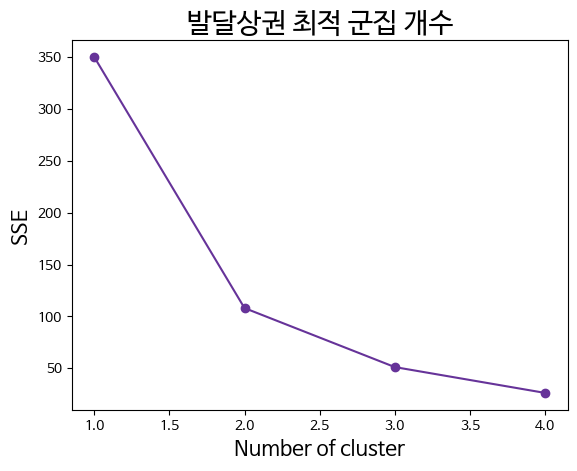

<Figure size 640x480 with 0 Axes>

In [ ]:
### 클러스터 개수 지정
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

sse = {}
for k in range(1,5):
  kmeans = KMeans(n_clusters = k, init = 'k-means++', max_iter = 300).fit(hotplace3.iloc[:,1:])
  sse[k] = kmeans.inertia_

plt.figure()
plt.scatter(list(sse.keys()), list(sse.values()), c='rebeccapurple')
plt.plot(list(sse.keys()), list(sse.values()), c='rebeccapurple')
plt.xlabel("Number of cluster", size = 15)
plt.ylabel("SSE", size = 15)
plt.title("발달상권 최적 군집 개수", size = 20)
plt.show() # 군집 2개가 적당

In [ ]:
dong = sales[['상권_코드_명', '법정동명']].drop_duplicates().reset_index(drop=True)
dong

상권_코드_명 법정동명
0                    세종대학교  군자동
1                중곡1동 마을마당  중곡동
2                    광진경찰서  구의동
3                   신자초등학교  자양동
4                  자양한강도서관  자양동
..                     ...  ...
56            신성시장(신성골목시장)  중곡동
57  중곡제일시장(중곡제일골목시장, 광성시장)  중곡동
58                화양제일골목시장  화양동
59                 영동교골목시장  자양동
60        자양골목전통시장(자양골목시장)  자양동

[61 rows x 2 columns]

In [ ]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300).fit(hotplace3.iloc[:,1:])
hotplace3['label'] = kmeans.labels_
hotplace3 = hotplace3.merge(dong, how = "inner", on = "상권_코드_명")
hotplace3.head()

상권_코드_명  제과점  반찬가게  분식전문점  시계및귀금속  한의원  피부관리실  중식음식점  네일숍  일반의원  ...  \
0  강변역(테크노마트)    0     0      0       0    0      0      0    0     0  ...   
1   건대입구역(건대)    0     0      0       0    0      0      0    0     1  ...   
2      구삼강변맛길    0     0      0       0    0      0      0    0     1  ...   
3       구의사거리    0     0      0       0    0      0      0    0     0  ...   
4         구의역    0     0      0       0    0      0      0    0     1  ...   

   일반교습학원  청과상  운동/경기용품        전체        요일        시간       연령대        성별  \
0       0    0        0  0.907937  2.615469  0.653598  0.995802  0.636294   
1       0    0        0  2.909111  8.653442  6.666839  5.358187  4.337923   
2       0    0        0 -0.702869 -2.058746 -1.645753 -0.755263 -0.953312   
3       0    0        0 -1.536284 -4.543314 -3.089895 -3.443255 -2.191207   
4       0    0        0 -0.224496 -0.670744 -0.031971 -0.284673 -0.270965   

   label  법정동명  
0      1   구의동  
1      1   화양동  
2      0   구의동  
3      0   구의동  
4      0   구의동  

[5 rows x 51 columns]

In [ ]:
def visualize_silhouette(cluster_lists, X_features, store):

    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산.
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=42)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title(store+ ' 군집 개수 : '+ str(n_cluster)+'\n' \
                          '실루엣 계수 :' + str(round(sil_avg,3)), fontsize=15)
        axs[ind].set_xlabel("The silhouette coefficient values", fontsize=10)
        axs[ind].set_ylabel("Cluster label", fontsize=10)
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현.
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

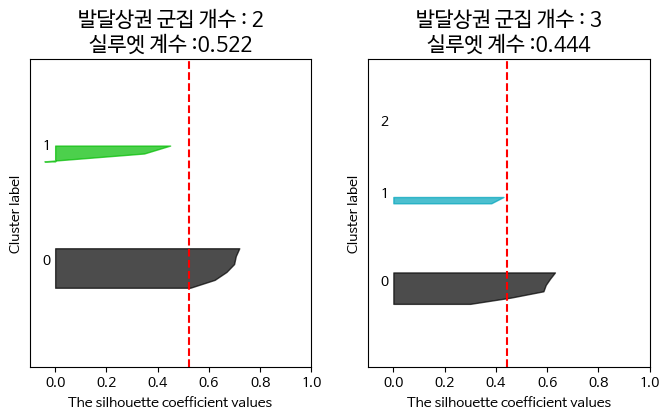

In [ ]:
visualize_silhouette([2,3], hotplace3.iloc[:,1:-2], "발달상권")

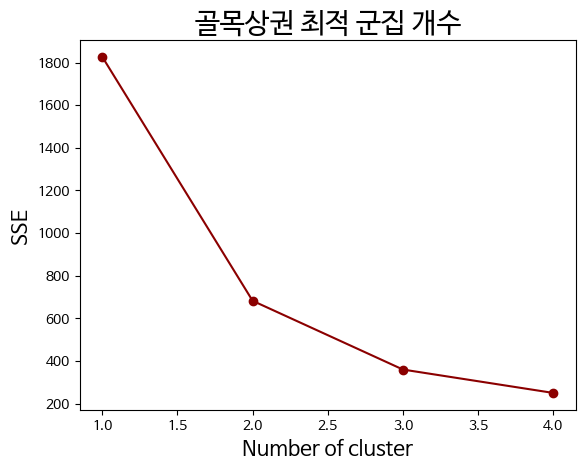

In [ ]:
sse = {}
for k in range(1,5):
  kmeans = KMeans(n_clusters = k, init = 'k-means++', max_iter = 300).fit(nearby3.iloc[:,1:])
  sse[k] = kmeans.inertia_

plt.figure()
plt.scatter(list(sse.keys()), list(sse.values()), c='darkred')
plt.plot(list(sse.keys()), list(sse.values()), c='darkred')
plt.xlabel("Number of cluster", size=15)
plt.ylabel("SSE", size=15)
plt.title("골목상권 최적 군집 개수", size=20)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300).fit(nearby3.iloc[:,1:])
nearby3['label'] = kmeans.labels_
nearby3 = nearby3.merge(dong, how = "inner", on = "상권_코드_명")
nearby3.head()

상권_코드_명  제과점  반찬가게  분식전문점  시계및귀금속  한의원  피부관리실  중식음식점  네일숍  일반의원  ...  \
0  건대입구역 1번    0     0      0       0    0      0      0    0     0  ...   
1  건대입구역 6번    0     1      0       0    0      0      1    0     0  ...   
2   광나루역 1번    0     0      0       0    0      0      1    0     0  ...   
3     광진경찰서    0     0      1       0    0      0      0    0     0  ...   
4      광진구청    0     0      0       0    0      0      0    0     0  ...   

   일반교습학원  청과상  운동/경기용품        전체         요일         시간        연령대        성별  \
0       0    0        0 -0.725005  -2.137943  -1.429422  -1.683090 -1.052132   
1       0    0        0  5.038284  14.973225  10.861584  10.045883  7.109064   
2       0    0        0  0.361417   1.132534   0.827792   0.892637  0.423379   
3       0    0        0 -1.456003  -4.292289  -3.199037  -3.098542 -2.000872   
4       0    0        0 -0.537085  -1.573283  -1.053113  -0.905607 -0.789983   

   label  법정동명  
0      0   화양동  
1      1   자양동  
2      0   광장동  
3      0   구의동  
4      0   자양동  

[5 rows x 51 columns]

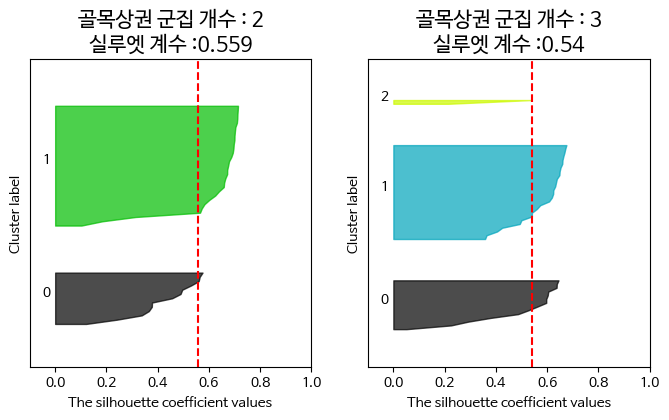

In [ ]:
visualize_silhouette([2,3], nearby3.iloc[:,1:-2], "골목상권")

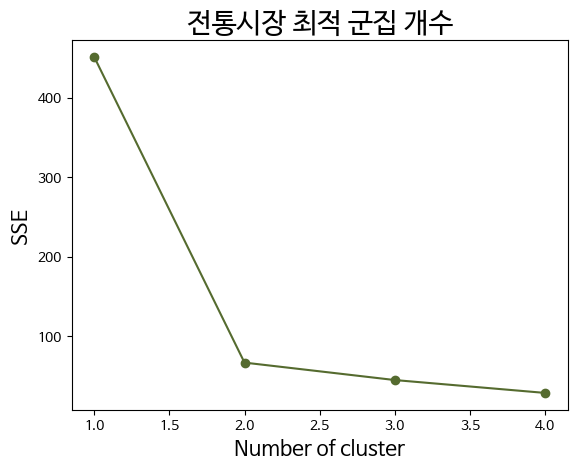

In [ ]:
sse = {}
for k in range(1,5):
  kmeans = KMeans(n_clusters = k, init = 'k-means++', max_iter = 300).fit(market3.iloc[:,1:])
  sse[k] = kmeans.inertia_

plt.figure()
plt.scatter(list(sse.keys()), list(sse.values()), c='darkolivegreen')
plt.plot(list(sse.keys()), list(sse.values()),  c='darkolivegreen')
plt.xlabel("Number of cluster", size = 15)
plt.ylabel("SSE", size = 15)
plt.title("전통시장 최적 군집 개수", size = 20)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300).fit(market3.iloc[:,1:])
market3['label'] = kmeans.labels_
market3 = market3.merge(dong, how = "inner", on = "상권_코드_명")
market3.head()

상권_코드_명  제과점  반찬가게  분식전문점  시계및귀금속  한의원  피부관리실  중식음식점  네일숍  일반의원  \
0  노룬산시장(노룬산골목시장)    0     0      0       0    0      0      0    0     1   
1         능동로골목시장    0     0      0       0    0      0      0    0     0   
2          면곡골목시장    0     0      0       0    0      0      0    0     0   
3    신성시장(신성골목시장)    0     0      0       0    0      0      0    0     0   
4         영동교골목시장    0     0      0       0    0      0      0    0     0   

   ...  일반교습학원  청과상  운동/경기용품        전체        요일        시간       연령대  \
0  ...       0    1        0 -0.745312 -2.238812 -1.747182 -1.816399   
1  ...       0    0        0 -0.423906 -1.236585 -0.898413 -1.052707   
2  ...       0    0        0 -1.046252 -3.107760 -2.327286 -2.313327   
3  ...       0    0        0 -0.206784 -0.570720 -0.516303 -0.765235   
4  ...       0    1        0 -1.196140 -3.570803 -2.635528 -2.642809   

         성별  label  법정동명  
0 -1.051960      1   자양동  
1 -0.610370      1   자양동  
2 -1.484561      1   중곡동  
3 -0.304864      1   중곡동  
4 -1.675069      1   자양동  

[5 rows x 51 columns]

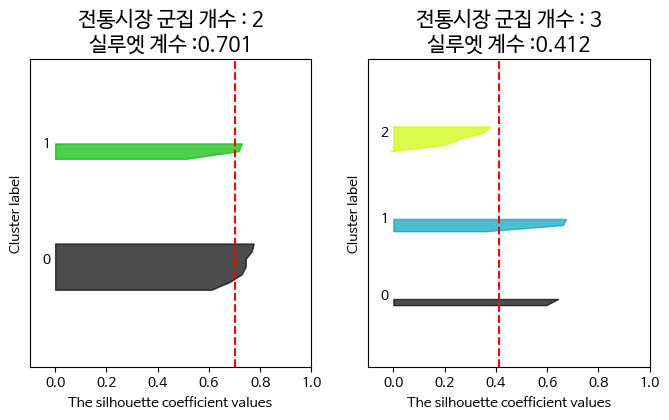

In [ ]:
visualize_silhouette([2,3], market3.iloc[:,1:-2], "전통시장")

## 클러스터 분석

In [ ]:
# 클러스터의 대표업종 데이터프레임을 반환하는 함수
def category_df(cluster):
  df = pd.DataFrame(cluster.sum())
  # 해당 클러스터의 대표업종인 경우만 남기기
  df = df[df[0] != 0]
  # 업종 관련 인덱스 조정
  df = df.iloc[1:list(df.index).index("전체"),:]
  df = df.rename(columns = {0:'상권수'})
  df = df.sort_values(by = '상권수', ascending = False)
  return df

# 상권 간 업종 차이 보기 함수
def category_diff(cluster0, cluster1):
  df0, df1 = category_df(cluster0), category_df(cluster1)
  # 클러스터0만의 업종
  print("클러스터0: ", set(df0.index) - set(df1.index))
  # 클러스터1만의 업종
  print("클러스터1: ", set(df1.index) - set(df0.index))

  return df0, df1

##  발달상권 군집 분석

In [ ]:
# 발달상권 군집0 확인 : 매출액 및 건수 적음
cluster0_발달 = hotplace3[hotplace3['label']==0]
cluster0_발달

상권_코드_명  수산물판매  핸드폰  화장품  네일숍  일반의류  전자상거래업  청과상  호프-간이주점  패스트푸드점  ...  \
2   구삼강변맛길      0    1    0    0     0       0    0        0       0  ...   
3    구의사거리      0    0    0    0     0       0    0        0       0  ...   
4      구의역      0    0    0    0     0       0    0        0       0  ...   
6     아차산역      0    0    0    0     1       0    0        0       0  ...   
7  어린이대공원역      0    0    0    0     0       0    0        1       1  ...   
8  올림픽대교북단      0    0    0    0     0       0    0        0       0  ...   

   애완동물  일반교습학원  치킨전문점        전체        요일        시간       연령대        성별  \
2     0       0      0 -0.702869 -2.058746 -1.645753 -0.755263 -0.953312   
3     0       0      0 -1.536284 -4.543314 -3.089895 -3.443255 -2.191207   
4     0       0      0 -0.224496 -0.670744 -0.031971 -0.284673 -0.270965   
6     0       0      0 -0.423237 -1.239158 -0.885970 -0.290156 -0.479114   
7     0       0      0 -1.057430 -3.117276 -2.164543 -3.016138 -1.485981   
8     0       1      0 -1.014474 -3.016713 -2.320217 -1.601790 -1.351108   

   label  법정동명  
2      0   구의동  
3      0   구의동  
4      0   구의동  
6      0    능동  
7      0   화양동  
8      0   구의동  

[6 rows x 51 columns]

In [ ]:
# 발달상권 군집1 확인 : 매출액 및 건수 적음
cluster1_발달 = hotplace3[hotplace3['label']==1]
cluster1_발달

상권_코드_명  수산물판매  핸드폰  화장품  네일숍  일반의류  전자상거래업  청과상  호프-간이주점  패스트푸드점  ...  \
0  강변역(테크노마트)      0    1    0    0     1       1    0        0       0  ...   
1   건대입구역(건대)      0    0    0    0     1       0    0        1       0  ...   
5         군자역      0    0    0    0     0       0    0        0       0  ...   

   애완동물  일반교습학원  치킨전문점        전체        요일        시간       연령대        성별  \
0     0       0      0  0.907937  2.615469  0.653598  0.995802  0.636294   
1     0       0      0  2.909111  8.653442  6.666839  5.358187  4.337923   
5     0       0      0  1.141742  3.377039  2.817913  3.037287  1.757470   

   label  법정동명  
0      1   구의동  
1      1   화양동  
5      1   군자동  

[3 rows x 51 columns]

In [ ]:
df0_발달, df1_발달 = category_diff(cluster0_발달, cluster1_발달)

클러스터0:  {'조명용품', '패스트푸드점', '일반교습학원', '외국어학원', '슈퍼마켓', '철물점'}
클러스터1:  {'가전제품', '전자상거래업', '커피-음료', '가구', '컴퓨터및주변장치판매'}


발달상권 군집0 분석
- 구의사거리가 조명용품이 많다..?

- 어린이대공원역에 패스트푸드점이 많다..? 어린이가 좋아해서 그런가 ㅇㅅㅇ

- 올림픽대교북단은 외국어학원과 일반교습학원이 많음. 광진구 내의 대표 학원상권. 올림피아드, 깊은 생각, 심슨어학원 등 주요 학원들이 위치해 있음. -> 주거지역

- 군집1의 모든 상권(구삼강변맛길, 구의사거리, 구의역, 아차산역, 어린이대공원역, 올림픽대교북단)에서 주요업종으로 슈퍼마켓이 있음. -> 주거지역..? 어린이대공원은 아가들이 까까 사먹나...
- 구의사거리에 철물점이 많음.-> 주거지역
---------------------------------------------------
* 세은 코멘트
- 전반적으로 군집1보다 주거지역에 가까운듯
- 학원, 생활용품점(조명용품, 철물점) 등 상품 및 서비스의 개당 단가가 비교적 낮고, 자주 구매하는 업종이 우세
- 어린이대공원을 제외하면 군집0에 비해 주고객 연령대가 높은 편(40대 이상)
----------------------------------------------------



발달상권 군집1 분석

- 군자역에 가구거리 존재
- 테크노마트가 있어 컴퓨터및주변장치판매, 가전제품, 전자상거래업이 주를 이룸.
- 건대입구역(건대)는 놀거리, 대학 상권이므로 커피-음료 업종이 주를 이룸.

-------------------------------------------------------
- 세은 코멘트 : 군집1
1. 전반적으로 군집0보다 핫플에 가까운듯
2. 가전제품, 가구 등 상품의 개당 단가가 비교적 높고 가끔 구매하는 업종이 우세

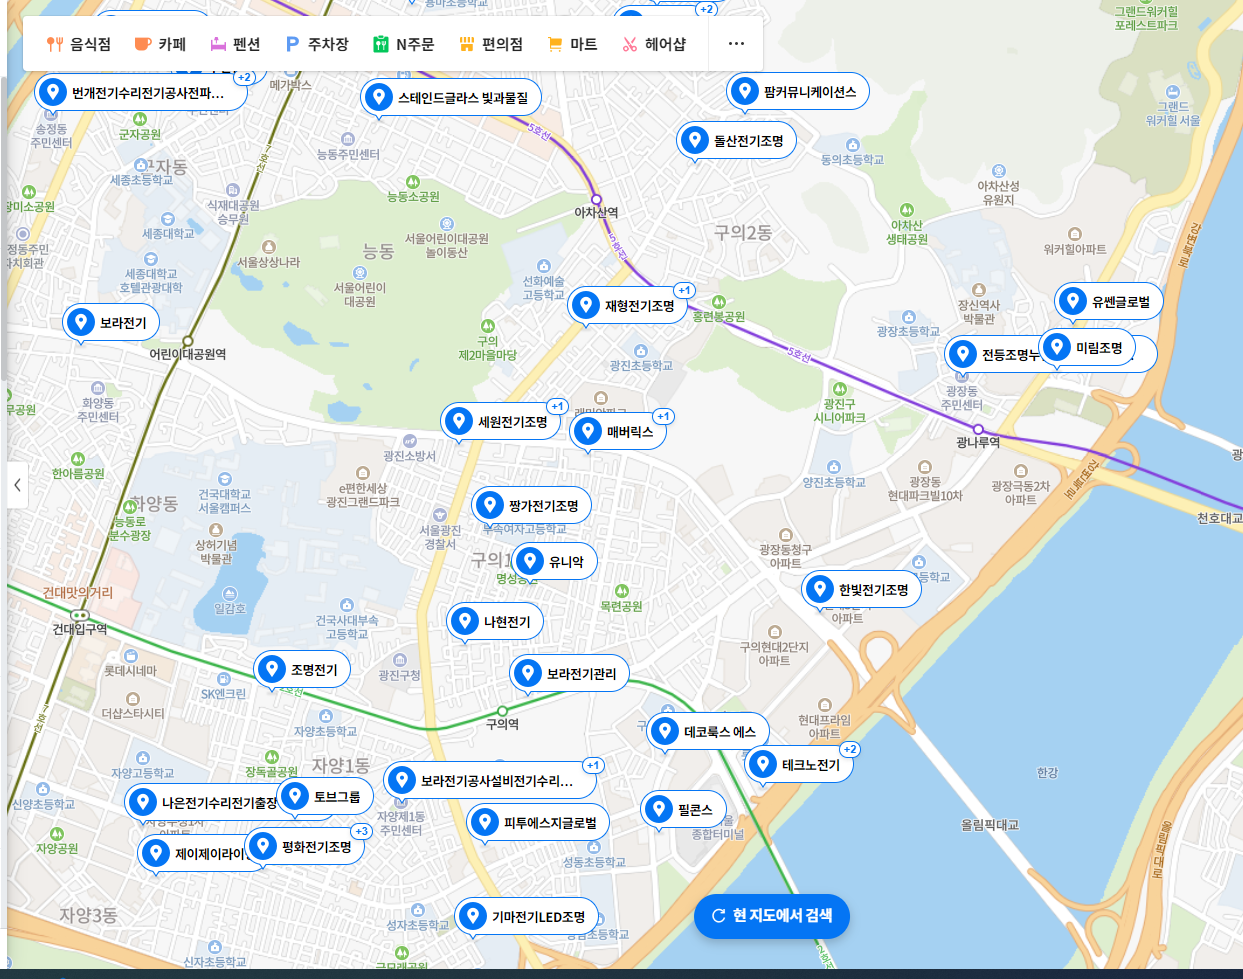

구의사거리 쪽에 조명 가게가 많긴한데.. 광장동이나 강변역, 자양동 쪽도 꽤 있다...

In [ ]:
df0_발달

상권수
슈퍼마켓      6
의약품       5
한식음식점     4
일반의원      4
편의점       3
핸드폰       1
일반의류      1
호프-간이주점   1
패스트푸드점    1
철물점       1
외국어학원     1
조명용품      1
일반교습학원    1

In [ ]:
df1_발달

상권수
일반의류         2
한식음식점        2
일반의원         2
핸드폰          1
전자상거래업       1
호프-간이주점      1
의약품          1
커피-음료        1
가구           1
편의점          1
컴퓨터및주변장치판매   1
가전제품         1

## 전통상권 군집 분석

In [ ]:
# 전통시장 군집0 확인 : 매출액 및 건수 적음
cluster0_전통 = market3[market3['label']==0]
cluster0_전통

상권_코드_명  수산물판매  핸드폰  화장품  네일숍  일반의류  전자상거래업  청과상  호프-간이주점  패스트푸드점  \
0  노룬산시장(노룬산골목시장)      0    0    1    0     0       0    1        0       0   
1         능동로골목시장      1    0    0    0     1       0    0        0       0   
2          면곡골목시장      0    1    0    0     1       0    0        0       0   
3    신성시장(신성골목시장)      0    0    0    0     1       0    0        0       0   
4         영동교골목시장      0    0    0    0     1       0    1        0       0   
6            조양시장      0    0    0    1     0       0    0        0       0   
8           한아름시장      0    0    0    0     0       0    0        0       0   

   ...  애완동물  일반교습학원  치킨전문점        전체        요일        시간       연령대        성별  \
0  ...     0       0      0 -0.745312 -2.238812 -1.747182 -1.816399 -1.051960   
1  ...     0       0      0 -0.423906 -1.236585 -0.898413 -1.052707 -0.610370   
2  ...     0       0      0 -1.046252 -3.107760 -2.327286 -2.313327 -1.484561   
3  ...     0       0      0 -0.206784 -0.570720 -0.516303 -0.765235 -0.304864   
4  ...     0       0      0 -1.196140 -3.570803 -2.635528 -2.642809 -1.675069   
6  ...     0       0      0 -1.431373 -4.293018 -3.083643 -3.026031 -2.011864   
8  ...     0       1      0 -1.060594 -3.182862 -2.258611 -1.632049 -1.476392   

   label  법정동명  
0      0   자양동  
1      0   자양동  
2      0   중곡동  
3      0   중곡동  
4      0   자양동  
6      0   자양동  
8      0   화양동  

[7 rows x 51 columns]

In [ ]:
# 전통시장 군집1 확인 : 매출액 및 건수 많음
cluster1_전통 = market3[market3['label']==1]
cluster1_전통

상권_코드_명  수산물판매  핸드폰  화장품  네일숍  일반의류  전자상거래업  청과상  호프-간이주점  \
5        자양골목전통시장(자양골목시장)      0    0    0    0     0       0    1        0   
7  중곡제일시장(중곡제일골목시장, 광성시장)      0    0    0    0     0       0    1        0   
9                화양제일골목시장      0    0    0    0     0       0    0        1   

   패스트푸드점  ...  애완동물  일반교습학원  치킨전문점        전체        요일        시간       연령대  \
5       0  ...     0       0      0  1.389908  4.279347  2.759196  2.788695   
7       0  ...     0       0      0  2.635104  7.900267  5.106199  4.875433   
9       0  ...     0       0      0  2.085348  6.020947  5.601572  5.584428   

         성별  label  법정동명  
5  1.936633      1   자양동  
7  3.660133      1   중곡동  
9  3.018314      1   화양동  

[3 rows x 51 columns]

- 신성시장: 광진구 내의 대표 시장

- 화양제일골목시장: 건대 맛의 거리와 이어져 있음.

- 능동로 골목시장: 작음

In [ ]:
df0_전통, df1_전통 = category_diff(cluster0_전통, cluster1_전통)

클러스터0:  {'수산물판매', '네일숍', '핸드폰', '화장품', '일반의류', '분식전문점', '의료기기', '제과점', '스포츠클럽', '미용실', '일반교습학원', '치과의원', '피부관리실'}
클러스터1:  {'호프-간이주점', '반찬가게'}


전통상권 군집0 분석

- 능동로골목시장에는 수산물판매가 주업종
- 한아름시장은 분식전문점, 스포츠 클럽, 일반교습학원이 주업종
- 노룬산시장은 화장품이 주업종
- 영동교골목시장은 의료기기가 주업종

- 한아름 시장은 화양제일골목시장 인근으로 마찬가지로 건대 상권에 인접해있음.
- 한아름 시장의 대표업종인 스포츠 클럽은 한아름 프라자로 추정됨.

- 군집1 내에서도 조양시장, 한아름 시장과 같이 젊은 층들이 이용할만한 시장은 주업종 종목이 확실히 다른듯.. 전통상권 군집이 3개로 나누어졌어도 좋았을것같다
----------------------------------------------------
* 세은 코멘트
- 영동교-노룬산-능동로 연결 : 여러 시장이 연결되어 있기 때문에 다양한 업종이 존재하는 것으로 보임
- 미용(화장품, 미용실, 네일숍, 피부관리실, 일반의류), 음식(분식, 제과점, 수산물), 의료(치과의원, 의료기기) 등의 업종이 우세
- 한아름시장은 유일하게 1~4분기 내내 주 고객 연령대가 20대
- 한아름시장 다음으로 젊은층이 찾는 시장은 조양시장과 화양제일골목시장

전통상권 군집1 분석

- 화양제일골목시장에 호프-간이주점이 주업종. 건대 상권과 이어져있음에 영향을 받았을 것으로 추정됨.

- 화양제일골목시장에 반찬가게가 주업종. 건대 자취생들이 많이 사먹나..? 주요 소비자 데이터를 살펴봐도 좋을듯

- 이외의 상권에는 해당 상권만의 큰 특징은 없는듯... -> 솔루션 제시
--------------------------------------------------
- 세은 코멘트
* 화양제일골목시장 주 고객 연령대 : 2학기+겨울방학인 1분기랑 4분기는 50대인데, 1학기+여름방학인 2분기랑 3분기는 각각 20대랑 30대였어. 자취생이라고 하기는 애매할 것 같고, 1학기 때 동아리나 학과 회식 저쪽에서 하나?
* 건대 상권과 연결되어 있으므로 젊은 고객을 유입하기에는 지리적으로 유리해보임. -> 지혜: 젊은 MZ세대들을 시장 상권에 더 유입할 수 있는 솔루션 제시 방향도 가능하겠다!

한아름시장은 우리가 소위 생각하는 시장의 모습과는 사뭇 다른듯. 거의 핫플이랑 구분이 안되고 검색해도 정보가 거의 안나옴. 시장이름 자체를 잘 안쓰는듯

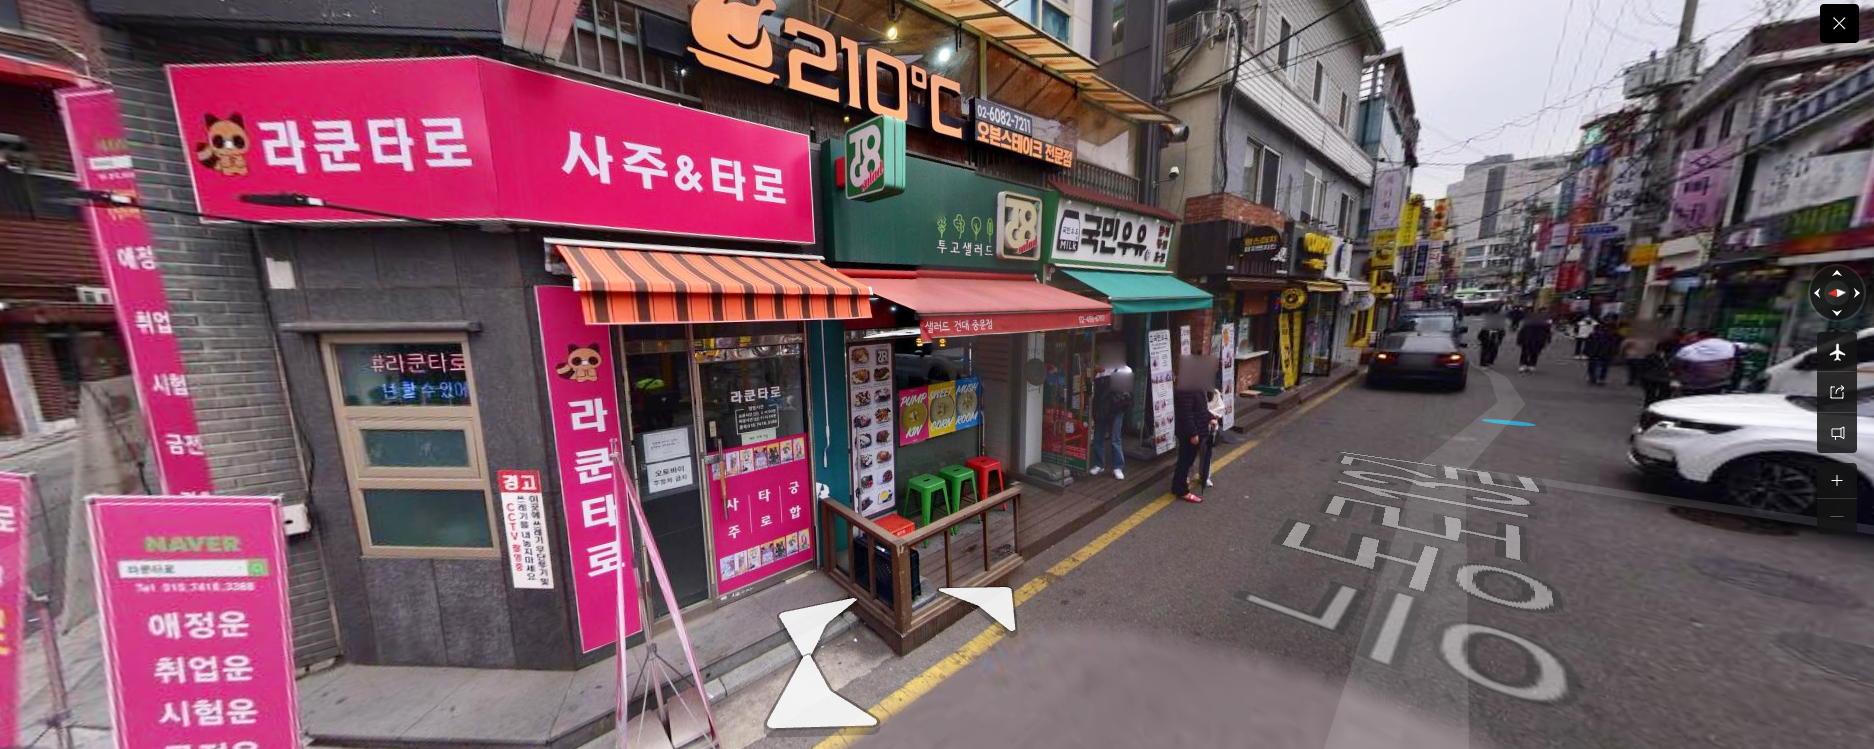

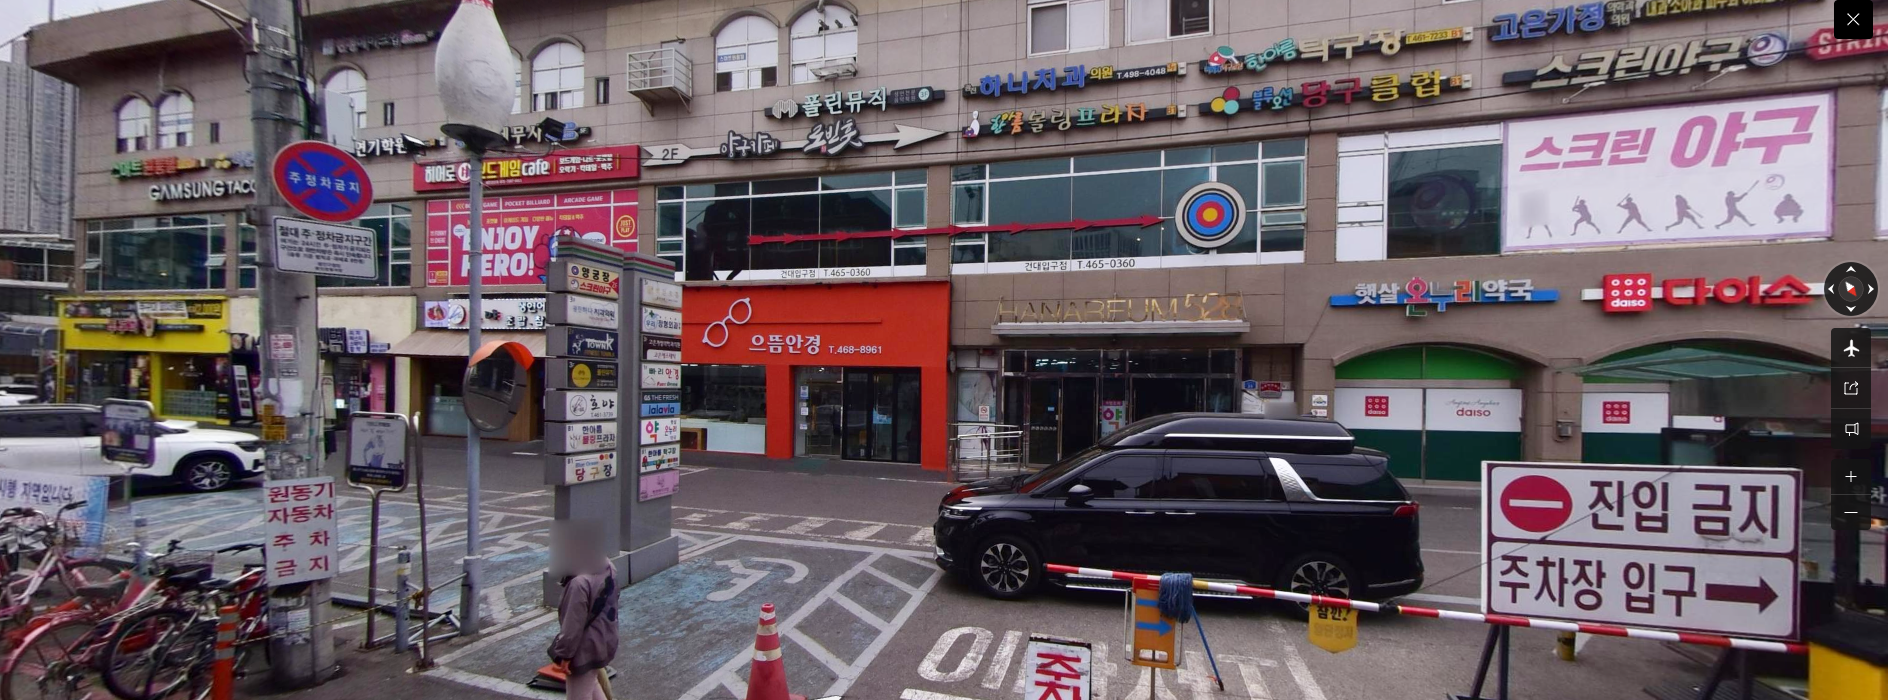

건대에서 스크린 야구, 탁구, 볼링, 양궁 등 놀거리가 모여 있는 대표적인 한아름 프라자가 한아름 시장

전통상권의 특징

- 대다수의 전통상권에서 육류판매, 한식음식점, 슈퍼마켓이 주업종인 경우가 많음.
------------------------------------------
- 세은 코멘트
* 이런 식으로 전반적인 특징을 집어주는 거 좋은 것 같아
* 전통상권의 경우, 발달상권이나 골목상권에 비해 여성의 구매력이 높다

In [ ]:
df0_전통

상권수
육류판매     4
일반의류     4
한식음식점    4
슈퍼마켓     3
의약품      3
청과상      2
일반의원     2
치과의원     2
수산물판매    1
의료기기     1
제과점      1
스포츠클럽    1
미용실      1
피부관리실    1
핸드폰      1
분식전문점    1
네일숍      1
화장품      1
일반교습학원   1

In [ ]:
df1_전통

상권수
한식음식점     3
육류판매      3
청과상       2
반찬가게      2
슈퍼마켓      2
호프-간이주점   1
의약품       1
일반의원      1

## 골목상권 군집 분석

In [ ]:
# 골목상권 군집0 확인 : 매출액 및 건수 적음
cluster0_골목 = nearby3[nearby3['label']==0]
cluster0_골목

상권_코드_명  수산물판매  핸드폰  화장품  네일숍  일반의류  전자상거래업  청과상  호프-간이주점  패스트푸드점  ...  \
0     건대입구역 1번      0    0    0    0     0       0    0        1       0  ...   
2      광나루역 1번      0    0    0    0     0       0    0        0       0  ...   
3        광진경찰서      0    0    0    0     1       0    0        0       0  ...   
4         광진구청      0    0    0    0     0       0    0        0       1  ...   
7       광진초등학교      0    0    0    0     0       0    0        0       0  ...   
8       구남초등학교      0    0    0    0     0       0    0        0       0  ...   
11    국립정신건강센터      0    0    0    0     0       0    0        0       0  ...   
12      군자역 4번      0    0    0    0     0       0    0        0       0  ...   
13      군자역 5번      0    0    0    0     1       0    0        0       0  ...   
15      대원고등학교      0    0    0    0     0       1    0        0       0  ...   
16       동대부여고      0    0    0    0     0       1    0        0       0  ...   
17      동의초등학교      0    0    0    0     1       0    0        0       0  ...   
18   뚝섬유원지역 1번      0    0    0    0     0       0    0        0       0  ...   
19      성동초등학교      0    0    0    0     0       0    0        0       0  ...   
20      성자초등학교      0    0    0    0     0       0    0        0       0  ...   
21       세종대학교      0    0    0    0     0       0    0        0       0  ...   
22      신자초등학교      0    0    0    0     0       0    0        0       0  ...   
24     아차산역 5번      0    0    0    0     1       0    0        0       0  ...   
25  어린이대공원역 3번      0    0    0    0     0       0    0        1       0  ...   
26  어린이대공원역 4번      0    0    0    0     0       0    0        1       0  ...   
29      자양동우체국      0    0    0    0     0       0    0        1       0  ...   
31    장로회신학대학교      0    0    0    0     0       0    0        0       0  ...   
32      장안초등학교      0    0    0    0     0       0    0        0       0  ...   
33   중곡1동 마을마당      0    0    0    0     0       0    0        0       0  ...   
34    중곡1동주민센터      0    0    0    0     0       0    0        1       0  ...   
36    중곡4동주민센터      0    0    0    0     0       0    0        0       0  ...   
37     중곡어린이공원      0    0    0    0     0       0    0        0       0  ...   
39      푸른동산공원      0    0    0    0     0       0    0        0       0  ...   
40       해오름공원      0    0    0    0     0       0    0        0       0  ...   

    애완동물  일반교습학원  치킨전문점        전체        요일        시간       연령대        성별  \
0      0       0      1 -0.725005 -2.137943 -1.429422 -1.683090 -1.052132   
2      0       0      0  0.361417  1.132534  0.827792  0.892637  0.423379   
3      0       0      0 -1.456003 -4.292289 -3.199037 -3.098542 -2.000872   
4      0       0      0 -0.537085 -1.573283 -1.053113 -0.905607 -0.789983   
7      0       1      0 -0.513321 -1.493953 -1.163948 -1.046257 -0.772543   
8      0       0      0 -0.710643 -2.104638 -1.628402 -1.663806 -1.037157   
11     0       1      0 -0.202376 -0.619843 -0.618334 -0.431537 -0.308318   
12     0       1      0 -0.832213 -2.478082 -1.862710 -1.865764 -1.134849   
13     0       0      1 -0.237779 -0.682243 -0.686037 -0.839752 -0.416813   
15     0       1      0 -0.939978 -2.778610 -2.110083 -1.348849 -1.274503   
16     0       0      0 -0.332966 -0.996341 -0.701690 -0.798772 -0.458731   
17     0       1      0 -1.655814 -4.868241 -3.704132 -3.521839 -2.280566   
18     0       0      0 -1.361026 -4.027791 -3.153984 -2.929160 -1.841382   
19     0       0      0  0.112039  0.270713  0.512447  0.329902  0.196817   
20     0       0      0  0.280720  0.820773  0.428413  0.909389  0.435341   
21     0       0      0 -1.456103 -4.291986 -3.340929 -3.285795 -2.100331   
22     0       1      0 -0.395336 -1.157877 -1.021956 -0.822637 -0.581300   
24     0       0      0 -0.358667 -1.202392 -1.111256 -1.248714 -0.524971   
25     0       0      0 -0.628309 -1.873375 -1.371932 -1.656266 -0.988863   
26     0       0      0 -1.303125 -3

In [ ]:
# 골목상권 군집0 확인 : 매출액 및 건수 많음
cluster1_골목 = nearby3[nearby3['label']==1]
cluster1_골목

상권_코드_명  수산물판매  핸드폰  화장품  네일숍  일반의류  전자상거래업  청과상  호프-간이주점  패스트푸드점  ...  \
1   건대입구역 6번      0    0    0    0     0       0    0        0       0  ...   
5     광진정말공원      0    0    0    0     0       0    0        0       0  ...   
6    광진정보도서관      0    0    0    0     1       0    0        0       0  ...   
9   구의1동주민센터      0    0    0    0     0       0    0        1       0  ...   
10    구의역 4번      0    0    1    0     1       0    0        0       0  ...   
14   능동우편취급국      0    0    0    0     0       0    0        0       0  ...   
23   아차산역 1번      0    0    0    0     0       0    0        0       0  ...   
27    용마초등학교      0    0    0    0     0       0    0        0       0  ...   
28  자양4동주민센터      0    0    0    0     0       0    0        0       0  ...   
30   자양한강도서관      0    0    0    0     0       0    0        1       0  ...   
35  중곡3동주민센터      0    0    0    0     0       0    0        0       0  ...   
38    중곡역 3번      0    0    0    0     0       0    0        0       0  ...   
41     화양사거리      0    0    0    0     0       0    0        0       0  ...   

    애완동물  일반교습학원  치킨전문점        전체         요일         시간        연령대        성별  \
1      0       0      0  5.038284  14.973225  10.861584  10.045883  7.109064   
5      0       0      0  0.719006   2.084429   1.570682   1.935779  1.146655   
6      0       0      0  1.141228   3.367084   2.057562   1.807791  1.279256   
9      1       0      0  1.658216   4.910180   3.768954   3.791731  2.368230   
10     0       0      0  3.141224   9.198595   6.976979   7.957398  4.466279   
14     0       0      0  0.633798   1.912889   1.502761   1.244902  0.840936   
23     0       0      0  1.129735   3.341160   2.174495   2.569640  1.700600   
27     0       0      0  1.507617   4.353977   3.113002   3.119046  2.158887   
28     0       0      0  0.920098   2.644578   2.267791   1.511205  1.161308   
30     0       0      0  1.232210   3.677462   2.633572   2.976005  1.708748   
35     0       0      0  1.827306   5.370642   4.468390   3.974149  2.690270   
38     0       0      0  0.961369   2.830722   2.021135   1.977359  1.442554   
41     0       0      0  2.026466   6.088602   5.343565   4.198527  2.745907   

    label  법정동명  
1       1   자양동  
5       1   자양동  
6       1   광장동  
9       1   구의동  
10      1   자양동  
14      1   군자동  
23      1   중곡동  
27      1   중곡동  
28      1   자양동  
30      1   자양동  
35      1   중곡동  
38      1   중곡동  
41      1   화양동  

[13 rows x 51 columns]

In [ ]:
df0_골목, df1_골목 = category_diff(cluster0_골목, cluster1_골목)

클러스터0:  {'노래방', '의료기기', '분식전문점', '일식음식점', '전자상거래업', '시계및귀금속', '예술학원', '가구', '한의원', '미용실', '일반교습학원', '패스트푸드점', '컴퓨터및주변장치판매', '치킨전문점'}
클러스터1:  {'화장품', '조명용품', '여관', '애완동물', '운동/경기용품'}


- 건대입구역 1번의 경우 클러스터0이고, 주업종이 한식음식점, 노래방, 호프, 편의점, 치킨전문점

- 건대입구역 6번의 경우 클러스터1이고, 주업종이 한식음식점, 중식음식점, 편의점, 반찬가게, 의약품

- 어린이대공원역 3번의 경우 클러스터0이고, 주업종이 한식음식점, 커피-음료, 호프, 중식음식점, 편의점

- 어린이대공원역 4번의 경우 클러스터0이고, 주업종이 한식음식점, 분식전문점, 호프, 철물점, 편의점


골목상권 군집0 분석

- 광진초등학교, 대원외고 등 학교 주변에서 일반교습학원이 주업종을 이룸.

- 군자역 4번, 뚝섬유원지역 1번, 세종대학교에서 예술학원이 주업종을 이룸.

골목상권 군집1 분석

- 유흥가가 밀집해있는 화양사거리에는 여관이 주업종을 이룸.
- 광진정보도서관 인근 리버사이드스포츠로 인해 주업종에 운동/경기용품이 있는 것으로 추정됨.
--------------------------------------------------
* 세은 코멘트
- 화양사거리, 건대입구역 6번 제외하고는 주고객 연령대가 높은 편
- 화양사거리, 건대입구역 6번 제외하고는 주거지역 인근


골목상권의 특징

- 골목상권 두 군집에서 모두 편의점, 한식음식점이 주업종을 이룸.

* 세은 코멘트
- 골목상권의 경우, 전통시장, 발달상권에 비해 전반적으로 남성의 구매력이 높음

In [ ]:
df0_골목

상권수
편의점         27
한식음식점       24
슈퍼마켓        10
커피-음료        8
미용실          7
일반교습학원       6
자동차수리        6
호프-간이주점      5
육류판매         5
치과의원         4
일반의류         4
의약품          4
분식전문점        4
예술학원         3
철물점          3
일식음식점        3
중식음식점        3
일반의원         3
노래방          2
컴퓨터및주변장치판매   2
전자상거래업       2
치킨전문점        2
가구           1
반찬가게         1
세탁소          1
제과점          1
시계및귀금속       1
의료기기         1
한의원          1
패스트푸드점       1

In [ ]:
df1_골목

상권수
한식음식점    13
편의점      12
의약품       6
반찬가게      6
일반의원      4
육류판매      3
슈퍼마켓      3
호프-간이주점   2
자동차수리     2
치과의원      2
일반의류      2
화장품       1
조명용품      1
제과점       1
세탁소       1
여관        1
커피-음료     1
운동/경기용품   1
중식음식점     1
철물점       1
애완동물      1

### 클러스터 시각화

In [ ]:
from sklearn.decomposition import PCA
import plotly.express as px

def plot_cluster(cluster0, cluster1, df, df2):
  cluster = pd.concat([cluster0, cluster1])

  pca = PCA().fit(df2)
  exp = np.cumsum(pca.explained_variance_ratio_)
 # print(exp[0], exp[1])
  pca = PCA(n_components=2, svd_solver="full")
  total_pca = pca.fit_transform(df2)
  total_pca = pd.DataFrame(total_pca, columns=['PCA1','PCA2'])
  df = pd.concat([df.loc[:,'상권_코드_명'], total_pca], axis = 1)
  cluster = pd.merge(df, cluster[['상권_코드_명', 'label']], on = '상권_코드_명')
  return cluster

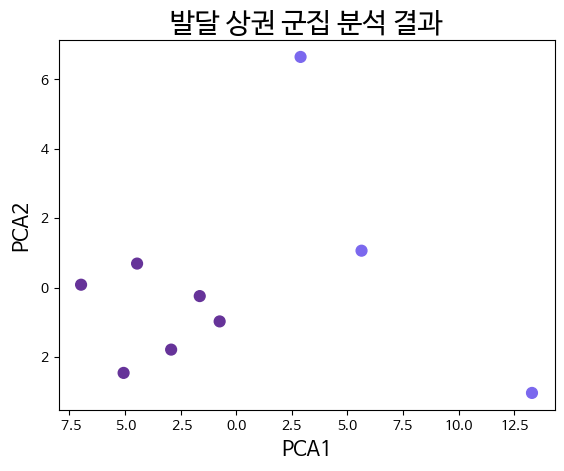

<Figure size 640x480 with 0 Axes>

In [ ]:
발달 = plot_cluster(cluster0_발달, cluster1_발달, hotplace, hotplace2)
발달['color'] = 발달['label'].map({0:'rebeccapurple', 1:'mediumslateblue'})

plt.scatter(발달['PCA1'], 발달['PCA2'], c = 발달['color'], s = 60)
plt.title("발달 상권 군집 분석 결과", size = 20)
plt.xlabel("PCA1", size = 15)
plt.ylabel("PCA2", size = 15)
plt.show()
plt.savefig('/content/drive/MyDrive/광진구팟/Data/시각화/발달상권군집분석결과.png')

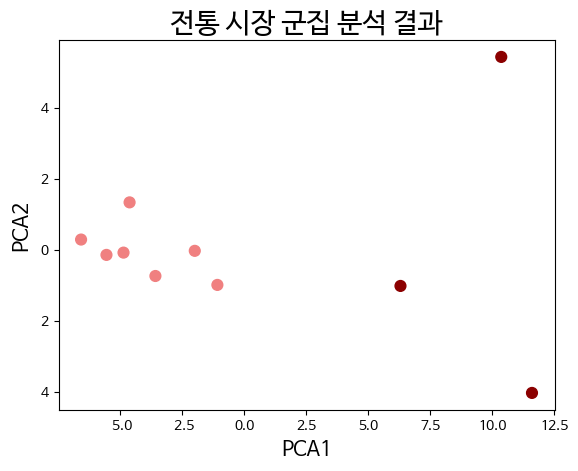

<Figure size 640x480 with 0 Axes>

In [ ]:
시장 = plot_cluster(cluster0_전통, cluster1_전통, market, market2)
시장['color'] = 시장['label'].map({0:'lightcoral', 1:'darkred'})

plt.scatter(시장['PCA1'], 시장['PCA2'], c = 시장['color'], s = 60)
plt.title("전통 시장 군집 분석 결과", size = 20)
plt.xlabel("PCA1", size = 15)
plt.ylabel("PCA2", size = 15)
plt.show()
plt.savefig('/content/drive/MyDrive/광진구팟/Data/시각화/전통시장군집분석결과.png')

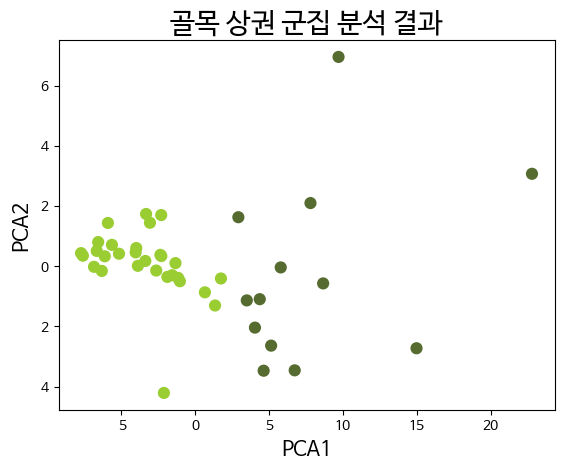

<Figure size 640x480 with 0 Axes>

In [ ]:
골목 = plot_cluster(cluster0_골목, cluster1_골목, nearby, nearby2)
골목['color'] = 골목['label'].map({0:'yellowgreen', 1:'darkolivegreen'})

plt.scatter(골목['PCA1'], 골목['PCA2'], c = 골목['color'], s = 60)
plt.title("골목 상권 군집 분석 결과", size = 20)
plt.xlabel("PCA1", size = 15)
plt.ylabel("PCA2", size = 15)
plt.show()
plt.savefig('/content/drive/MyDrive/광진구팟/Data/시각화/골목상권군집분석결과.png')

In [ ]:
from sklearn.decomposition import PCA
import plotly.express as px

def plot_cluster2(cluster, df, df2):

  pca = PCA().fit(df2)
  exp = np.cumsum(pca.explained_variance_ratio_)
  print(exp[0], exp[1])
  pca = PCA(n_components=2, svd_solver="full")
  total_pca = pca.fit_transform(df2)
  total_pca = pd.DataFrame(total_pca, columns=['PCA1','PCA2'])
  df = pd.concat([df.loc[:,'상권_코드_명'], total_pca], axis = 1)
  cluster = pd.merge(df, cluster[['상권_코드_명', 'label']], on = '상권_코드_명')
  plt.scatter(cluster['PCA1'],cluster['PCA2'], c = cluster['label'])
  plt.show()
  return cluster

0.8328194580221249 0.9152258589951819


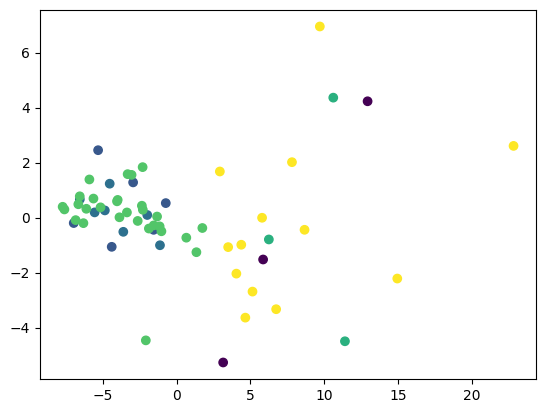

In [ ]:
cluster1_발달['label'] += 2
cluster0_전통['label'] += 4
cluster1_전통['label'] += 6
cluster0_골목['label'] += 8
cluster1_골목['label'] += 10

cluster = pd.concat([cluster0_발달, cluster1_발달, cluster0_전통, cluster1_전통, cluster0_골목, cluster1_골목]).reset_index(drop = True)
df = pd.concat([hotplace, market, nearby]).reset_index(drop = True)
df2 = pd.concat([hotplace2, market2, nearby2]).reset_index(drop = True)

상권 = plot_cluster2(cluster, df, df2)